# Loading Required Libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

# Loading Dataset

In [23]:
# Creating Database Connection
conn=sqlite3.connect('inventory.db')

# Fetching Data of Vendor Summary Data
df=pd.read_sql_query('''select * from vendor_sales_summary''',conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesPrice,TotalSalesDollars,TotalSalesQuantity,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,672819.31,5101919.51,142049.0,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,561512.37,4819073.49,160247.0,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,461140.15,4538120.60,187140.0,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,420050.01,4475972.88,200412.0,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,545778.28,4223107.62,135838.0,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


# Summary Statistics

In [96]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05


# Distribution Plots for Numerical Columns

<function matplotlib.pyplot.show(close=None, block=None)>

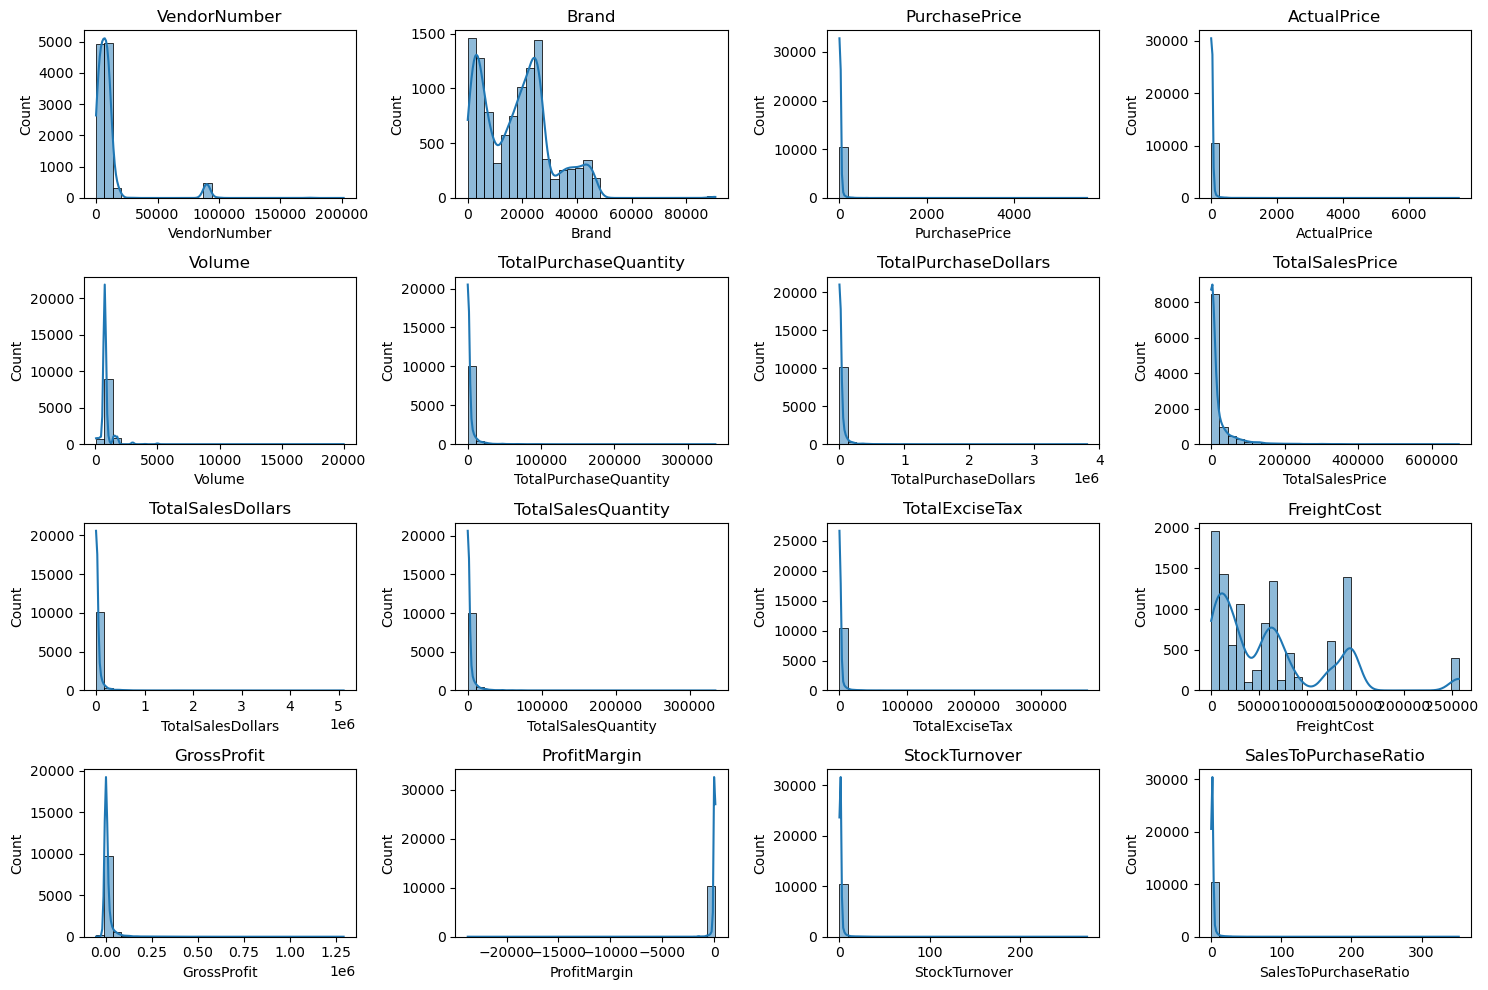

In [104]:
numerical_cols=df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show
    

# Identifying Outliers using Boxplots

<function matplotlib.pyplot.show(close=None, block=None)>

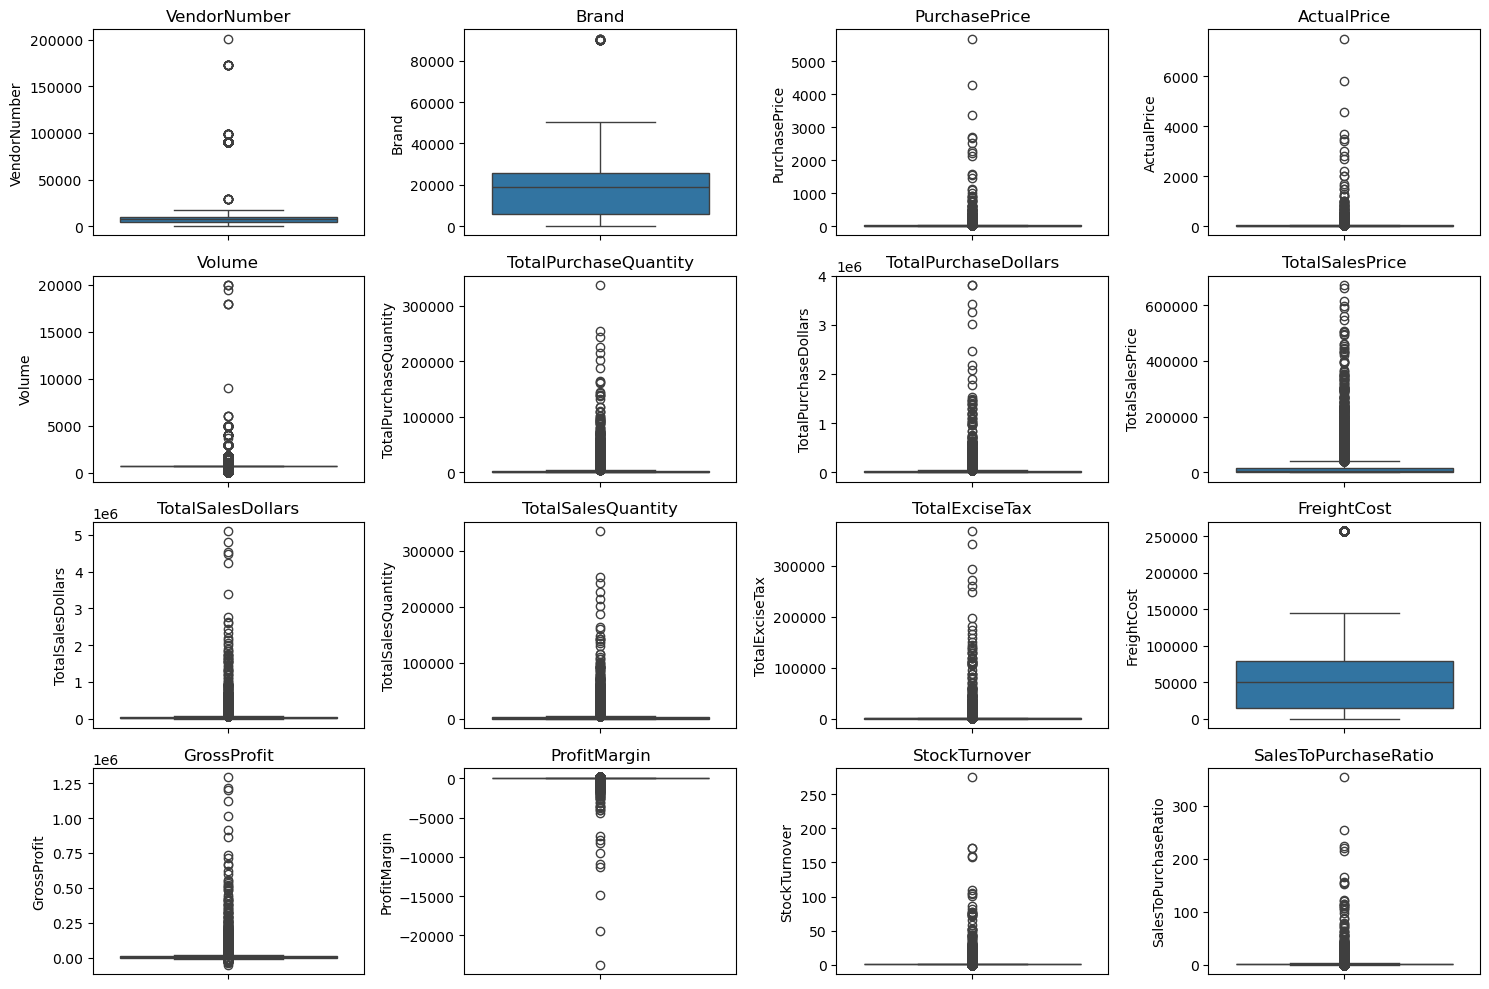

In [28]:
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show

# Removing Unwanted Outliers 

In [31]:
# Filtering The data to remove inconsistencies

df= pd.read_sql_query('''select * from vendor_sales_summary
where GrossProfit > 0
and ProfitMargin > 0
and TotalSalesQuantity > 0
''',conn)

In [33]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesPrice,TotalSalesDollars,TotalSalesQuantity,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,672819.31,5101919.51,142049.0,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,561512.37,4819073.49,160247.0,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,461140.15,4538120.60,187140.0,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,420050.01,4475972.88,200412.0,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,545778.28,4223107.62,135838.0,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,10.96,15.95,5.0,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,1.47,65.66,134.0,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,0.99,1.98,2.0,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,77.61,143.28,72.0,15.12,257032.07,141.81,98.974037,72.000000,97.469388


<function matplotlib.pyplot.show(close=None, block=None)>

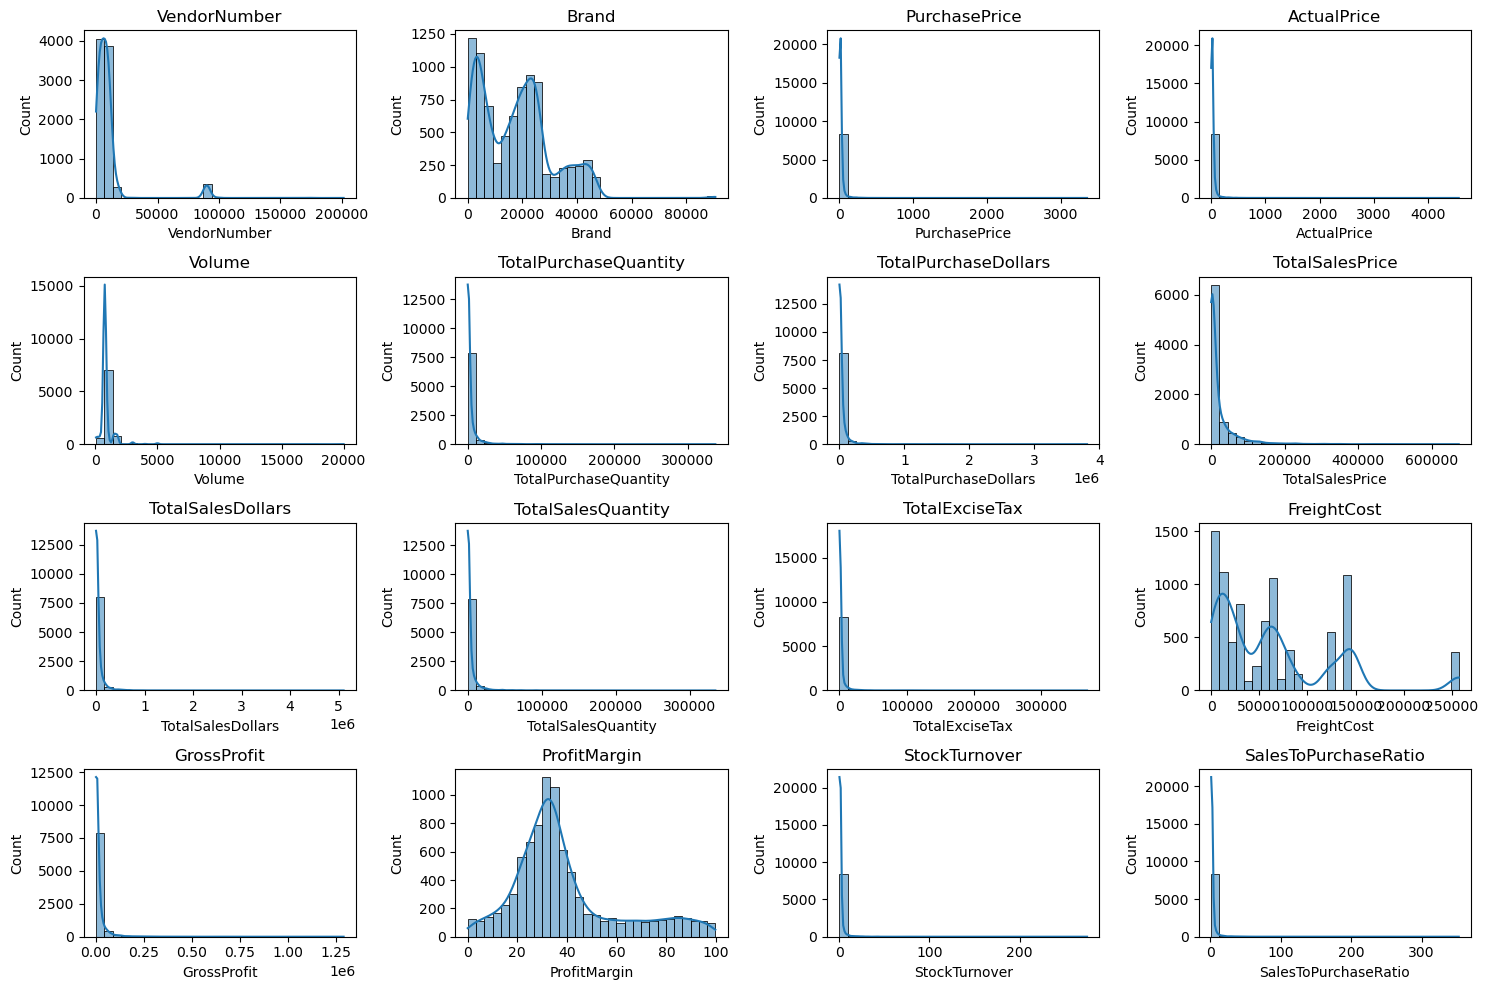

In [35]:
numerical_cols=df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show
    

# Identifying Top 10 Vendors

<function matplotlib.pyplot.show(close=None, block=None)>

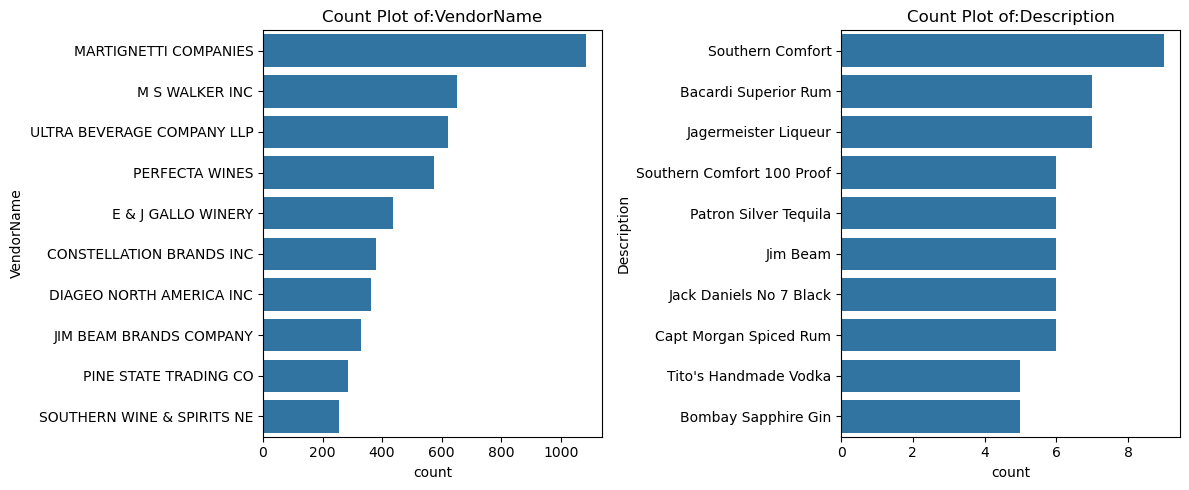

In [38]:
# Count Plots for Categorical Data
categorical_cols=['VendorName','Description']

plt.figure(figsize=(12,5))
for i,col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col],order=df[col].value_counts().index[:10])
    plt.title(f'Count Plot of:{col}')
plt.tight_layout()
plt.show
    

# Identifying Relationship between Columns using Heatmap

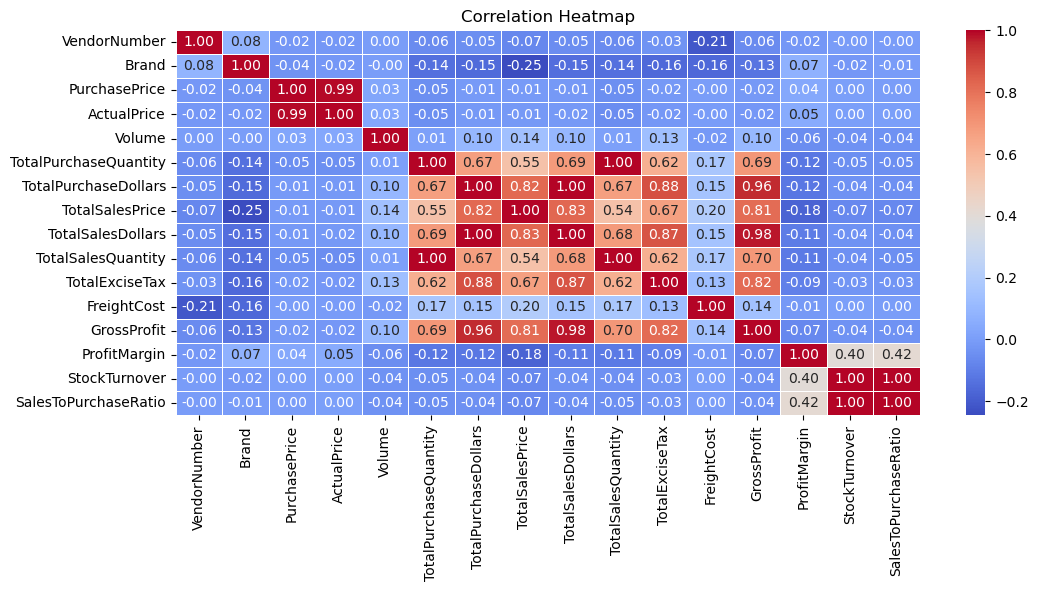

In [41]:
# Correlation Heatmap
plt.figure(figsize=(12,5))
correlation_matrix=df[numerical_cols].corr()
sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#

# Data Analysis
**Problem 1: Identifying Brands that needs Promotional or Pricing Adjustments which exhibit lower Sales Performance but Higher Profit Margins**

In [27]:
brand_performance=df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'}).reset_index()

In [29]:
low_sales_threshold=brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold=brand_performance['ProfitMargin'].quantile(0.85)

In [31]:
low_sales_threshold

286.185

In [33]:
high_margin_threshold

56.198056057839054

In [35]:
# Filtering Brands with low sales but high profit margins
target_brands=brand_performance[
    (brand_performance['TotalSalesDollars']<=low_sales_threshold) &
    (brand_performance['ProfitMargin']>=high_margin_threshold)
]
print("Brands with low sales but high profit margins")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with low sales but high profit margins


,Description,TotalSalesDollars,ProfitMargin
7777,Santa Rita Organic Svgn Bl,9.99,66.466466
2896,Debauchery Pnt Nr,11.58,65.975820
2537,Concannon Glen Ellen Wh Zin,15.95,83.448276
2677,Crown Royal Apple,27.86,89.806174
7818,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
8939,Tommasi Poggio Tufo Cab Svgn,269.73,74.789604
9229,Vigne A Porrona Rosso,272.79,96.825397
5736,Mad Dogs & Englishmen Jumil,279.80,97.666190
3980,Gifft Chardonnay,279.80,94.245890


In [37]:
# filtering out data for better visualisation
brand_performance=brand_performance[brand_performance['TotalSalesDollars']<10000]

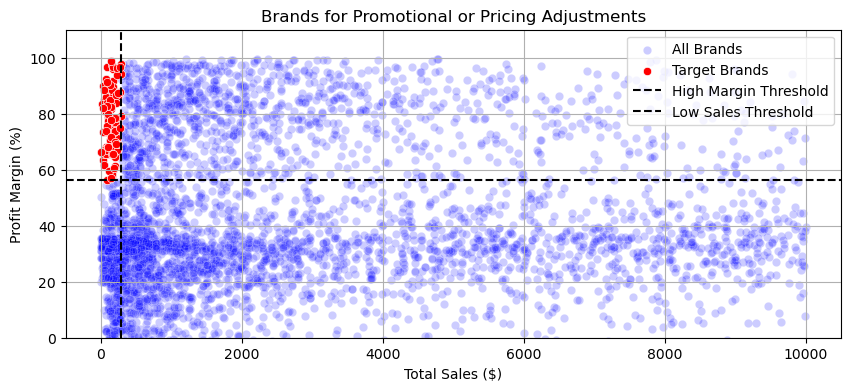

In [43]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=brand_performance,x='TotalSalesDollars',y='ProfitMargin',color='blue',label='All Brands',alpha=0.2)
sns.scatterplot(data=target_brands,x='TotalSalesDollars',y='ProfitMargin',color='red',label='Target Brands')

plt.axhline(high_margin_threshold,linestyle='--',color='black',label='High Margin Threshold')
plt.axvline(low_sales_threshold,linestyle='--',color='black',label='Low Sales Threshold')

plt.xlabel('Total Sales ($)')
plt.ylabel('Profit Margin (%)')
plt.ylim(0, 110)
plt.title('Brands for Promotional or Pricing Adjustments')
plt.legend()
plt.grid(True)
plt.show()

#

**Problem 2: Which Vendors and Brands demonstrate the highest sales performance?**

In [106]:
# Top Vendors and Brands by Sales Performance
top_vendors=df.groupby('VendorName')['TotalSalesDollars'].sum().nlargest(10)
top_brands=df.groupby('Description')['TotalSalesDollars'].sum().nlargest(10)

In [108]:
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: TotalSalesDollars, dtype: float64

In [110]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [53]:
# Formating the sales values
def format_dollars(value):
    if value>1_000_000:
        return f'{value/1_000_000:.2f}M'
    elif value>=1_000:
        return f'{value/1_000:.2f}K'
    else:
        return str(value)

In [116]:
top_brands.apply(lambda x:format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

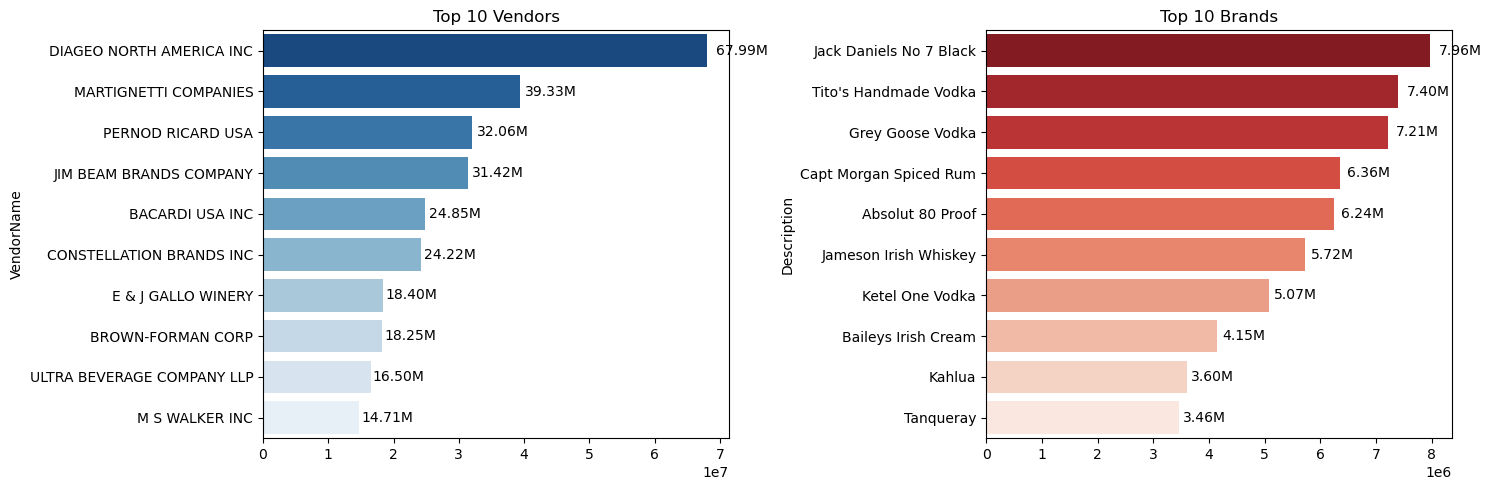

In [174]:
# Plotting on Bar plot
plt.figure(figsize=(15,5))
# for Top Vendors
plt.subplot(1,2,1)
ax1=sns.barplot(y=top_vendors.index,x=top_vendors.values,palette='Blues_r')
plt.title("Top 10 Vendors")

for bar in ax1.patches:
    ax1.text(bar.get_width()+(bar.get_width()*0.02),
    bar.get_y()+bar.get_height()/2,
    format_dollars(bar.get_width()),
    ha='left',va='center',fontsize=10,color='black')

# for Top Brands
plt.subplot(1,2,2)
ax2=sns.barplot(y=top_brands.index,x=top_brands.values,palette='Reds_r')
plt.title("Top 10 Brands")


for bar in ax2.patches:
    ax2.text(bar.get_width()+(bar.get_width()*0.02),
    bar.get_y()+bar.get_height()/2,
    format_dollars(bar.get_width()),
    ha='left',va='center',fontsize=10,color='black')

plt.tight_layout()
plt.show()

#

**Problem 3: Which Vendors Contribute the most to Total Purchase Dollars?**

In [45]:
vendor_performance=df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()

In [47]:
vendor_performance['Purchase_Contribution%']=vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()*100

In [49]:
vendor_performance=round(vendor_performance.sort_values('Purchase_Contribution%',ascending=False),2)

In [55]:
# Display Top 10 Vendors
top_vendors=vendor_performance.head(10)

top_vendors['TotalSalesDollars']=top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars']=top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit']=top_vendors['GrossProfit'].apply(format_dollars)

top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,Purchase_Contribution%
28,DIAGEO NORTH AMERICA INC,50.96M,17.78M,68.74M,15.83
63,MARTIGNETTI COMPANIES,27.86M,13.10M,40.96M,8.66
50,JIM BEAM BRANDS COMPANY,24.20M,7.70M,31.90M,7.52
74,PERNOD RICARD USA,24.12M,8.16M,32.28M,7.49
8,BACARDI USA INC,17.62M,7.38M,25.01M,5.48
23,CONSTELLATION BRANDS INC,15.57M,8.89M,24.47M,4.84
14,BROWN-FORMAN CORP,13.53M,4.95M,18.48M,4.20
114,ULTRA BEVERAGE COMPANY LLP,13.21M,4.59M,17.80M,4.10
33,E & J GALLO WINERY,12.29M,6.26M,18.55M,3.82
59,M S WALKER INC,10.94M,4.50M,15.44M,3.40


In [57]:
top_vendors['Purchase_Contribution%'].sum()

65.34

In [59]:
top_vendors['Cummulative_Contribution%']=top_vendors['Purchase_Contribution%'].cumsum()

In [61]:
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,Purchase_Contribution%,Cummulative_Contribution%
28,DIAGEO NORTH AMERICA INC,50.96M,17.78M,68.74M,15.83,15.83
63,MARTIGNETTI COMPANIES,27.86M,13.10M,40.96M,8.66,24.49
50,JIM BEAM BRANDS COMPANY,24.20M,7.70M,31.90M,7.52,32.01
74,PERNOD RICARD USA,24.12M,8.16M,32.28M,7.49,39.50
8,BACARDI USA INC,17.62M,7.38M,25.01M,5.48,44.98
23,CONSTELLATION BRANDS INC,15.57M,8.89M,24.47M,4.84,49.82
14,BROWN-FORMAN CORP,13.53M,4.95M,18.48M,4.20,54.02
114,ULTRA BEVERAGE COMPANY LLP,13.21M,4.59M,17.80M,4.10,58.12
33,E & J GALLO WINERY,12.29M,6.26M,18.55M,3.82,61.94
59,M S WALKER INC,10.94M,4.50M,15.44M,3.40,65.34


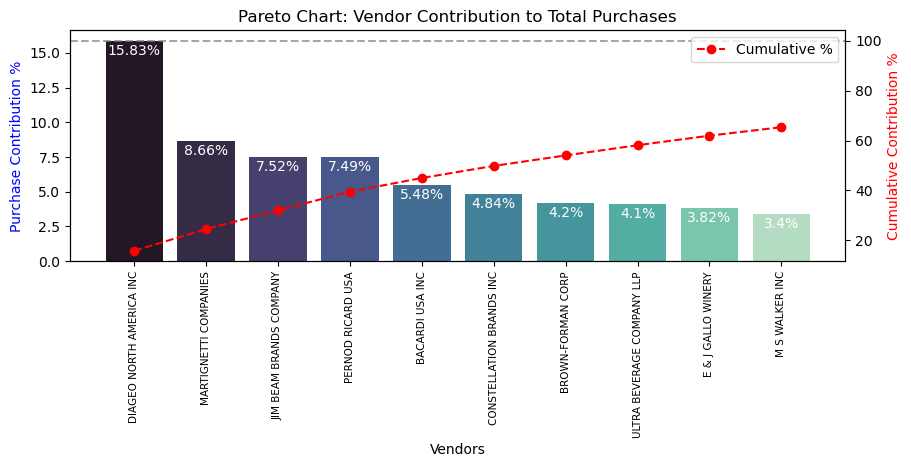

In [81]:
# Visualising using Pareto Chart
fig,ax1=plt.subplots(figsize=(10,3))

# Bar Plot for PUrchase Contribution %
sns.barplot(x=top_vendors['VendorName'],y=top_vendors['Purchase_Contribution%'],palette='mako',ax=ax1)

for i,value in enumerate(top_vendors['Purchase_Contribution%']):
    ax1.text(i,value-1,str(value)+'%',ha='center',color='white',fontsize=10)

# Line Plot for Cumulative Contribution %
ax2=ax1.twinx()
ax2.plot(top_vendors['VendorName'],top_vendors['Cummulative_Contribution%'],color='red',marker='o',linestyle='dashed',label='Cumulative %')

ax1.set_xticklabels(top_vendors['VendorName'],rotation=90, size=7.5)
ax1.set_ylabel('Purchase Contribution %',color='blue')
ax2.set_ylabel('Cumulative Contribution %',color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100,color='gray',linestyle='dashed',alpha=0.7)
ax2.legend(loc='upper right')

plt.show()


#

**Problem 4: How much Total Procurement is dependent on the Top Vendors?**

In [349]:
print(f"Total Purchase Contribution of Top 10 Vendors is {round(top_vendors['Purchase_Contribution%'].sum(), 2)}%")

Total Purchase Contribution of Top 10 Vendors is 65.69%


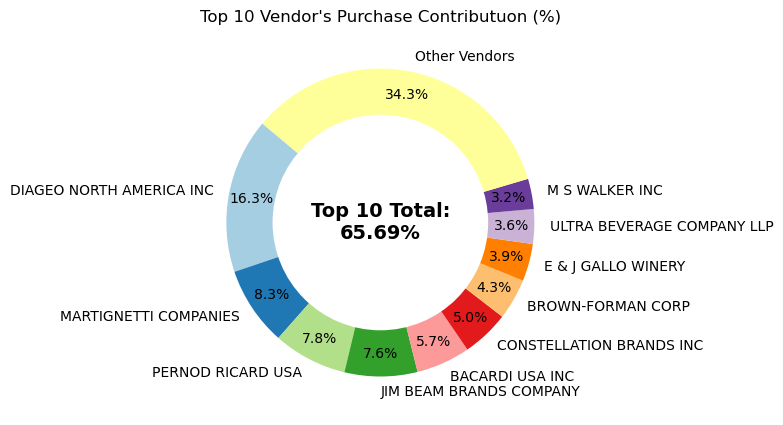

In [361]:
vendors=list(top_vendors['VendorName'].values)
purchase_contributions=list(top_vendors['Purchase_Contribution%'].values)
total_contribution=sum(purchase_contributions)
remaining_contribution=100-total_contribution

# adding other vendors category
vendors.append('Other Vendors')
purchase_contributions.append(remaining_contribution)

# Donut Chart for Visualisation
fig,ax=plt.subplots(figsize=(5,5))
wedges,texts,autotexts= ax.pie(purchase_contributions,labels=vendors,autopct='%1.1f%%',
                              startangle=140,pctdistance=0.85,colors=plt.cm.Paired.colors)

# Giving Donut Effect
centre_circle=plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# Adding Total Contribution Notes in the middle
plt.text(0, 0, f'Top 10 Total:\n{total_contribution:.2f}%',fontsize=14,fontweight='bold',ha='center',va='center')

plt.title("Top 10 Vendor's Purchase Contributuon (%)")
plt.show()



#

**Problem 5: Did Purchasing in Bulk reduce the unit price, and What is the optimal purchase volume for Cost Savings?**

In [376]:
df['UnitPurchasePrice']=df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']

In [378]:
df['OrderSize']=pd.qcut(df['TotalPurchaseQuantity'],q=3,labels=['small','medium','large'])
df[['OrderSize','TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,large,145080
1,large,164038
2,large,187407
3,large,201682
4,large,138109
...,...,...
8559,small,2
8560,small,6
8561,small,2
8562,small,1


In [382]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
small,39.068186
medium,15.486414
large,10.777625


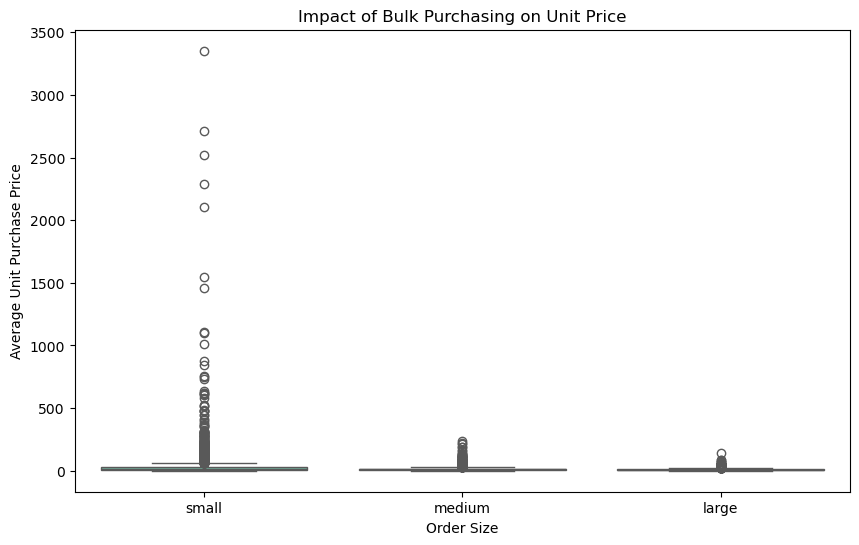

In [386]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='OrderSize',y='UnitPurchasePrice',palette='Set2')
plt.title('Impact of Bulk Purchasing on Unit Price')
plt.xlabel('Order Size')
plt.ylabel('Average Unit Purchase Price')
plt.show()

#

**Problem 6: Which vendor has Low Inventory Turnover, indicating excess stock and slow-moving products?**

In [400]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending=True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


#

**Problem 7: How much capital is locked in unsold inventory per vendor, and which vendors contribute most to it?**

In [410]:
df['UnsoldInventoryValue']=(df['TotalPurchaseQuantity']-df['TotalSalesQuantity'])*df['PurchasePrice']
print("Total Unsold Capital:",format_dollars(df['UnsoldInventoryValue'].sum()))

Total Unsold Capital: 2.71M


In [420]:
# Aggregate Capital locked per vendor
inventory_value_per_vendor=df.groupby('VendorName')['UnsoldInventoryValue'].sum().reset_index()

# Sorting vendors with highest locked capital
inventory_value_per_vendor=inventory_value_per_vendor.sort_values(by='UnsoldInventoryValue',ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue']=inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


#

#

In [444]:
df.to_csv("vendor_sales_summary.csv", index=False)